In [691]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.cluster import AgglomerativeClustering 
from sklearn import svm
from sklearn.metrics import roc_auc_score


In [692]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [693]:
df= pd.read_csv('Phishing_Legitimate_full.csv')
df.head(10)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
5,6,3,1,1,42,1,0,0,0,0,...,1,1,0,1,1,1,1,-1,1,1
6,7,2,0,5,60,0,0,0,0,0,...,0,0,0,1,0,1,1,-1,-1,1
7,8,1,0,3,30,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
8,9,8,7,2,76,1,1,0,0,0,...,0,0,0,-1,-1,1,1,1,-1,1
9,10,2,0,2,46,0,0,0,0,0,...,0,0,0,1,1,1,1,-1,-1,1


### 1.2 Check for missing values and fill them with the median value

In [694]:
df.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [695]:
X = df.iloc[:, 1:49]
X.head(10)

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,3,1,5,72,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,-1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,0,1,-1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,0,1,0,-1,1,-1,0
3,3,1,6,79,1,0,0,0,0,0,...,1,0,0,0,1,-1,1,1,1,-1
4,3,0,4,46,0,0,0,0,0,0,...,0,1,0,0,1,1,-1,0,-1,-1
5,3,1,1,42,1,0,0,0,0,0,...,0,1,1,0,1,1,1,1,-1,1
6,2,0,5,60,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,-1,-1
7,1,0,3,30,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
8,8,7,2,76,1,1,0,0,0,0,...,0,0,0,0,-1,-1,1,1,1,-1
9,2,0,2,46,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,-1,-1


In [696]:
Y = df.iloc[:, 49]
Y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: CLASS_LABEL, dtype: int64

In [735]:
df.iloc[:, 1:50].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NumDots,10000.0,2.445100,1.346836,1.0,2.000000,2.000000,3.000000,21.0
SubdomainLevel,10000.0,0.586800,0.751214,0.0,0.000000,1.000000,1.000000,14.0
PathLevel,10000.0,3.300300,1.863241,0.0,2.000000,3.000000,4.000000,18.0
UrlLength,10000.0,70.264100,33.369877,12.0,48.000000,62.000000,84.000000,253.0
NumDash,10000.0,1.818000,3.106258,0.0,0.000000,0.000000,2.000000,55.0
NumDashInHostname,10000.0,0.138900,0.545744,0.0,0.000000,0.000000,0.000000,9.0
AtSymbol,10000.0,0.000300,0.017319,0.0,0.000000,0.000000,0.000000,1.0
TildeSymbol,10000.0,0.013100,0.113709,0.0,0.000000,0.000000,0.000000,1.0
NumUnderscore,10000.0,0.323200,1.114660,0.0,0.000000,0.000000,0.000000,18.0
NumPercent,10000.0,0.073800,0.622248,0.0,0.000000,0.000000,0.000000,19.0


### 1.3 Perform Feature selection

### 1.4 Solve the classification problem based on the given example using SVM. Goal is to predict whether the client has Heart disease or not (1/0)

In [697]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [698]:

predmodel = svm.SVC(kernel='linear')
predmodel.fit(X_train, y_train)

SVC(kernel='linear')

In [699]:
y_pred = predmodel.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

### 1.5 Measure accuracy

In [700]:
SVM_accuracy = accuracy_score(y_test, y_pred)
SVM_accuracy

0.94325

In [701]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("True Negative:", tn/4000) #SVM
print("False Positive:", fp/4000)
print("False Negative:", fn/4000)
print("True Positive:", tp/4000)

True Negative: 0.4535
False Positive: 0.032
False Negative: 0.02475
True Positive: 0.48975


In [702]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.9434583841273649, 0.9429918061089376, 0.9431753288305413, None)

In [703]:
roc_auc_score(y_test, y_pred) #SVM

0.9429918061089376

In [704]:
regr = LogisticRegression()

In [705]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [706]:
regr.fit(X_train, y_train)

C:\Users\letam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [707]:
y_pred = regr.predict(X_test)

In [708]:
regrScore = regr.score(X_test, y_test)

In [709]:
regrScore

0.9295

In [710]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("True Negative:", tn/4000) #LR
print("False Positive:", fp/4000)
print("False Negative:", fn/4000)
print("True Positive:", tp/4000)

True Negative: 0.44925
False Positive: 0.03625
False Negative: 0.03425
True Positive: 0.48025


In [711]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.9294892137537778, 0.9293826107756623, 0.9294321843291403, None)

In [712]:
roc_auc_score(y_test, y_pred) #LR

0.9293826107756623

In [713]:
from sklearn import tree

In [714]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [715]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [716]:
y_pred = clf.predict(X_test)

In [717]:
DTC_accuracy = accuracy_score(y_test, y_pred)
DTC_accuracy

0.96125

In [718]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("True Negative:", tn/4000) #CART
print("False Positive:", fp/4000)
print("False Negative:", fn/4000)
print("True Positive:", tp/4000)

True Negative: 0.46475
False Positive: 0.02075
False Negative: 0.018
True Positive: 0.4965


In [719]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.9612988109096853, 0.9611375666935893, 0.9612108981610276, None)

In [720]:
roc_auc_score(y_test, y_pred) #CART

0.9611375666935894

In [721]:
from sklearn.ensemble import RandomForestClassifier

In [722]:
RFC_clf = RandomForestClassifier(max_depth=18, random_state=0)

In [723]:
RFC_clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=18, random_state=0)

In [724]:
y_pred = RFC_clf.predict(X_test)

In [725]:
RFC_accuracy = accuracy_score(y_test, y_pred)

In [726]:
RFC_accuracy #RFC

0.982

In [727]:
from sklearn.metrics import precision_recall_fscore_support

In [728]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.9819387116948093, 0.9820428980772831, 0.9819868684270834, None)

In [729]:
from sklearn.metrics import confusion_matrix

In [731]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() 

print("True Negative:", tn/4000) #RFC
print("False Positive:", fp/4000)
print("False Negative:", fn/4000)
print("True Positive:", tp/4000)

True Negative: 0.4775
False Positive: 0.008
False Negative: 0.01
True Positive: 0.5045


In [732]:
roc_auc_score(y_test, y_pred) #RFC

0.9820428980772831

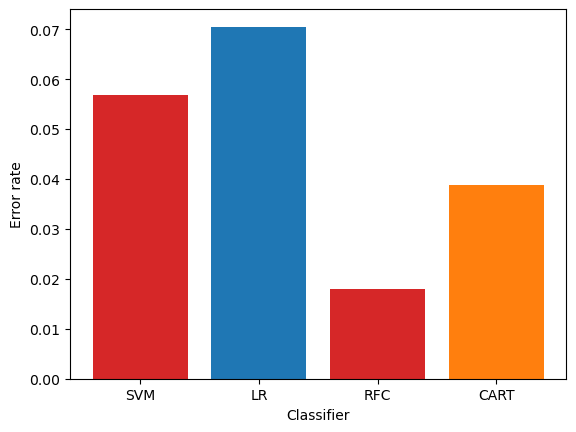

In [733]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

classifiers = ['SVM', 'LR', 'RFC', 'CART']
counts = [1-SVM_accuracy, 1 - regrScore , 1- RFC_accuracy, 1 -DTC_accuracy]
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange', 'tab:purple']
ax.bar(classifiers, counts, color=bar_colors)

ax.set_ylabel('Error rate')
ax.set_xlabel('Classifier')

plt.show()

In [688]:
print('SVM: ', round(1-SVM_accuracy, 4), ', LR: ', round(1 - regrScore, 4) ,', RFC: ', round(1- RFC_accuracy, 4), ', CART: ', round(1 -DTC_accuracy, 4))

SVM:  0.0567 , LR:  0.0705 , RFC:  0.018 , CART:  0.04
